In [1]:
import sys
sys.path.append('/Users/zhengj10/Python/Modules')

import h5py
import os
import numpy as np
from skimage.io import imsave
import matplotlib.pyplot as plt
import yaml
import pandas as pd
import PatcherBot as pb
from glob import glob
import seaborn as sns


### Load data

In [2]:
# imgPath = '/Users/zhengj10/Desktop/Temp/Ben/'
sumPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/summary'
# imgPath = '/Volumes/genie/BenArthur/patch-screen/bot'
# rawPath = '/Users/zhengj10/Desktop/'
# rawPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw_dead_sensor'
rawPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw'
os.path.exists(rawPath)


True

In [ ]:
# datePath = pb.getPathInfo(rawPath)
datePath = ['2020.07.22_000','2020.07.23_000']
datePath


In [10]:
# df = pd.read_pickle(sumPath + '/summary_sel.pkl')
df = pd.read_pickle(sumPath + '/Voltron_I-Clamp.pkl')
print(len(df))
df


47


,Date,Plate,Well,Cell,Mutation,Transfected_date,RMP,MP_amp,dFF,F0,RMP_min,MP_amp_max,dFF/MP_amp
0,2020.07.22_000,plate_000,well_1,patch_attempt_0003_000,421.1,200714,"[-0.06425785857084028, -0.06388101667840311, -...","[0.08715603302598302, 0.0892992009076558, 0.08...","[-0.07248142995172709, -0.08156681501650366, -...","[1956.037948717949, 1948.883492063492, 1943.79...",-0.063881,0.090572,"[-0.8316283731054954, -0.9134103573989627, -0...."
1,2020.07.22_000,plate_000,well_1,patch_attempt_0008_000,421.1,200714,"[-0.03848919684196172, -0.035207904241263986, ...","[0.08314363659537027, 0.0812099518333743, 0.07...","[-0.07258470159766595, -0.07629865662011281, -...","[1764.378183831672, 1760.5590733590732, 1760.4...",-0.033391,0.091813,"[-0.8730036906000298, -0.9395234807756268, -1...."
2,2020.07.22_000,plate_000,well_1,patch_attempt_0012_000,421.1,200714,"[-0.058804044756766774, -0.03584463260240031, ...","[0.023876263865291274, 0.032320004401207574, 0...","[-0.09325703792446377, -0.08170683233311822, -...","[2041.8419860627178, 2031.5974025974028, 2019....",-0.035845,0.036155,"[-3.905847181561381, -2.5280575868382433, -2.3..."
3,2020.07.22_000,plate_000,well_1,patch_attempt_0015_000,421.1,200714,"[-0.06715125536479181, -0.06135128059454, -0.0...","[0.014594596866037335, 0.03086974348965071, 0....","[-0.055886656817587595, -0.0535018786298813, -...","[1980.3780952380953, 1983.2395604395604, 1995....",-0.061351,0.030870,"[-3.8292703341220626, -1.7331494396063953, -4...."
4,2020.07.22_000,plate_000,well_1,patch_attempt_0016_000,421.1,200714,"[-0.05797349724496353, -0.0622820249437062, -0...","[0.02324781759953603, 0.022393775253573528, 0....","[-0.08420101303753116, -0.08669551664116656, -...","[1819.3414154652685, 1818.3317733990148, 1815....",-0.057973,0.025681,"[-3.621888922563278, -3.871411392651713, -3.55..."
5,2020.07.22_000,plate_000,well_1,patch_attempt_0020_000,421.1,200714,"[-0.061409774396018024, -0.06180098996518825, ...","[0.07347521444568457, 0.07408754772777673, 0.0...","[-0.05424987034431734, -0.0558268572936153, -0...","[1847.684658143413, 1845.6072231139647, 1841.4...",-0.050058,0.078052,"[-0.7383424567535046, -0.7535255114495418, -0...."
6,2020.07.22_000,plate_001,well_1,patch_attempt_0021_000,421.2096,200714,"[-0.06555335933989974, -0.06579851766649442, -...","[0.09456849431436151, 0.09579316209185929, 0.0...","[-0.1655318851431192, -0.1839638111393843, -0....","[1934.6063122923586, 1930.951298701299, 1928.2...",-0.063835,0.102593,"[-1.750391463280186, -1.9204273783443457, -1.4..."
7,2020.07.22_000,plate_001,well_1,patch_attempt_0022_000,421.2096,200714,"[-0.05580087959619068, -0.05661347610738561, -...","[0.05708724775789751, 0.05898870255552846, 0.0...","[-0.09623479876353958, -0.08088228219803884, -...","[1804.3712585034014, 1803.250569675723, 1803.9...",-0.052079,0.066981,"[-1.6857494894772949, -1.3711486893935505, -1...."
8,2020.07.22_000,plate_001,well_1,patch_attempt_0023_000,421.2096,200714,"[-0.060850844369280656, -0.061053590652732255,...","[0.06313000711533916, 0.061164095920535816, 0....","[-0.07679416447261066, -0.05978000254997547, -...","[2033.2375, 2027.1709750566893, 2029.027360774...",-0.060851,0.063130,"[-1.2164447301947383, -0.977370819436969, -1.3..."
9,2020.07.22_000,plate_001,well_1,patch_attempt_0027_000,421.2096,200714,"[-0.06149469514926129, -0.0613285276336243, -0...","[0.0401675283589166, 0.041376079437175195, 0.0...","[-0.062454644713726755, -0.06380101382486238, ...","[1856.3734010759113, 1852.8072535991141, 1857....",-0.061026,0.050174,"[-1.5548540641003306, -1.5419782321748694, -1...."


In [ ]:
def get_dff(trace):
    dff = []
    ref = np.mean(trace[50:120,:,:],axis=0)
    fb = np.min(ref)
    crop = ref[234:274,:]
    max_val = np.max(crop)
    act_pix = crop > (fb + (max_val-fb)*0.67)
    f0 = np.sum(act_pix * crop) / np.sum(act_pix)
    for frame in range(trace.shape[0]):
        dff_single = ((np.sum(trace[frame, 234:274, :]*act_pix)/np.sum(act_pix)) - f0)/(f0-fb)
        dff.append(dff_single)
#     dff = np.mean(dff[950:1050])
    dff = np.min(dff)
    return dff, f0


In [ ]:
columns = ['Date','Plate','Well','Cell','Mutation','Transfected_date','RMP','MP_amp',
           'dFF','F0','RMP_min','MP_amp_max','dFF/MP_amp']
df = pd.DataFrame(columns = columns)
df


In [ ]:
data_all={}
for param in(df.columns):
    data_all[param] = []
for date in datePath:
    platePath = pb.getPathInfo(os.path.join(rawPath, date))
    for plate in platePath:
        idxFile = os.path.join(rawPath, date, plate, '.index')
        a = yaml.load(open(idxFile), Loader=yaml.FullLoader)
        mutation = a['.']['mutation_1']
#         if date == '2020.02.03_000':
#             mutation = '421.1(em:545/20)'
#         else:
#             mutation = '421.1(em:545/40)'
        note = a['.']['notes'][0:6]
        cellPath = pb.getPathInfo(os.path.join(rawPath, date, plate))
        for cell in(cellPath):
            if not os.path.exists(os.path.join(rawPath, date, plate, cell, 'camera_clamp1_000')):
                continue
            print(os.path.join(rawPath, date, plate, cell))
            data_all['Date'].append(date)
            data_all['Plate'].append(plate)
            data_all['Well'].append('well_1')
            data_all['Cell'].append(cell)
            data_all['Mutation'].append(mutation)
            data_all['Transfected_date'].append(note[:6])
            RMP = []
            MP_amp = []
            
            
            F0 = []
            dff_list = []
            norm_dff_list = []

            for trial in range(10):
                dataFile = os.path.join(rawPath,date,plate,cell,'camera_clamp1_000',str(trial).zfill(3),'Camera','frames.ma')
                data = h5py.File(dataFile, 'r')
                imgData = data['data'][()]
                dff_single, f0_single = get_dff(imgData)
                ivFile = os.path.join(rawPath,date,plate,cell,'camera_clamp1_000',str(trial).zfill(3),'Clamp1.ma')
                data = h5py.File(ivFile)
                meta = data['data'][()]
                ivTrace = meta[1,:]
                RMP.append(np.mean(ivTrace[3000:3500]))
                MP_amp.append(np.max(ivTrace))
                F0.append(f0_single)
                dff_list.append(dff_single)
                norm_dff_list.append(dff_single/np.max(ivTrace))

            
            data_all['F0'].append(F0)
            data_all['RMP'].append(RMP)
            data_all['MP_amp'].append(MP_amp)
            data_all['RMP_min'].append(np.max(RMP))
            data_all['MP_amp_max'].append(np.max(MP_amp))
            data_all['dFF'].append(dff_list)
            data_all['dFF/MP_amp'].append(norm_dff_list)
            
print('Done!')


In [ ]:
df

In [ ]:
df = pd.DataFrame(data_all, columns = list(df)) # columns specification keeps the order of columns; index specification makes sure dict keys are the columns 
df

### Plot

- Filter data

In [4]:
threshold = {
            'RMP_min':-0.045,
            'MP_amp_max':0.12,
            'MP_amp_min':0.015
        }


In [11]:
df2 = df[(df.RMP_min<threshold['RMP_min'])&(df.MP_amp_max<threshold['MP_amp_max'])]
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_colwidth', 80)
print(len(df2))
# df
df2


33


,Date,Plate,Well,Cell,Mutation,Transfected_date,RMP,MP_amp,dFF,F0,RMP_min,MP_amp_max,dFF/MP_amp
0,2020.07.22_000,plate_000,well_1,patch_attempt_0003_000,421.1,200714,"[-0.06425785857084028, -0.06388101667840311, -...","[0.08715603302598302, 0.0892992009076558, 0.08...","[-0.07248142995172709, -0.08156681501650366, -...","[1956.037948717949, 1948.883492063492, 1943.79...",-0.063881,0.090572,"[-0.8316283731054954, -0.9134103573989627, -0...."
3,2020.07.22_000,plate_000,well_1,patch_attempt_0015_000,421.1,200714,"[-0.06715125536479181, -0.06135128059454, -0.0...","[0.014594596866037335, 0.03086974348965071, 0....","[-0.055886656817587595, -0.0535018786298813, -...","[1980.3780952380953, 1983.2395604395604, 1995....",-0.061351,0.030870,"[-3.8292703341220626, -1.7331494396063953, -4...."
4,2020.07.22_000,plate_000,well_1,patch_attempt_0016_000,421.1,200714,"[-0.05797349724496353, -0.0622820249437062, -0...","[0.02324781759953603, 0.022393775253573528, 0....","[-0.08420101303753116, -0.08669551664116656, -...","[1819.3414154652685, 1818.3317733990148, 1815....",-0.057973,0.025681,"[-3.621888922563278, -3.871411392651713, -3.55..."
5,2020.07.22_000,plate_000,well_1,patch_attempt_0020_000,421.1,200714,"[-0.061409774396018024, -0.06180098996518825, ...","[0.07347521444568457, 0.07408754772777673, 0.0...","[-0.05424987034431734, -0.0558268572936153, -0...","[1847.684658143413, 1845.6072231139647, 1841.4...",-0.050058,0.078052,"[-0.7383424567535046, -0.7535255114495418, -0...."
6,2020.07.22_000,plate_001,well_1,patch_attempt_0021_000,421.2096,200714,"[-0.06555335933989974, -0.06579851766649442, -...","[0.09456849431436151, 0.09579316209185929, 0.0...","[-0.1655318851431192, -0.1839638111393843, -0....","[1934.6063122923586, 1930.951298701299, 1928.2...",-0.063835,0.102593,"[-1.750391463280186, -1.9204273783443457, -1.4..."
7,2020.07.22_000,plate_001,well_1,patch_attempt_0022_000,421.2096,200714,"[-0.05580087959619068, -0.05661347610738561, -...","[0.05708724775789751, 0.05898870255552846, 0.0...","[-0.09623479876353958, -0.08088228219803884, -...","[1804.3712585034014, 1803.250569675723, 1803.9...",-0.052079,0.066981,"[-1.6857494894772949, -1.3711486893935505, -1...."
8,2020.07.22_000,plate_001,well_1,patch_attempt_0023_000,421.2096,200714,"[-0.060850844369280656, -0.061053590652732255,...","[0.06313000711533916, 0.061164095920535816, 0....","[-0.07679416447261066, -0.05978000254997547, -...","[2033.2375, 2027.1709750566893, 2029.027360774...",-0.060851,0.063130,"[-1.2164447301947383, -0.977370819436969, -1.3..."
9,2020.07.22_000,plate_001,well_1,patch_attempt_0027_000,421.2096,200714,"[-0.06149469514926129, -0.0613285276336243, -0...","[0.0401675283589166, 0.041376079437175195, 0.0...","[-0.062454644713726755, -0.06380101382486238, ...","[1856.3734010759113, 1852.8072535991141, 1857....",-0.061026,0.050174,"[-1.5548540641003306, -1.5419782321748694, -1...."
10,2020.07.22_000,plate_001,well_1,patch_attempt_0029_000,421.2096,200714,"[-0.0628508811968203, -0.06267385284694285, -0...","[0.05075443737366665, 0.04933640368656552, 0.0...","[-0.07683850259793173, -0.08634783567453158, -...","[1983.927102803738, 1976.9795739348372, 1976.3...",-0.062012,0.050754,"[-1.51392679288764, -1.7501850403020844, -2.01..."
11,2020.07.22_000,plate_002,well_1,patch_attempt_0031_000,421.4909,200714,"[-0.05832710274233501, -0.058783612210267025, ...","[0.07645631083831451, 0.08129052202840525, 0.0...","[-0.0990942455101427, -0.09757519781663457, -0...","[1933.1797947908447, 1929.2909407665506, 1927....",-0.057634,0.093231,"[-1.2960898116010542, -1.2003268693801594, -1...."


In [12]:
sensors = df.Mutation.unique()
# sensors = ['376.20950','485.20950']
sensors
print(len(sensors))



9


In [15]:
# mean_dFF_list = []
# mean_dFF_MP_amp_ratio_list = []

for index, row in df2.iterrows():
#     mean_dFF = np.mean(row['dFF'])
#     mean_dFF_MP_amp_ratio = np.mean(row['dFF/MP_amp'])
#     mean_dFF_list.append(mean_dFF)
#     mean_dFF_MP_amp_ratio_list.append(mean_dFF_MP_amp_ratio)

    

In [16]:
df2['mean_dFF'] = mean_dFF_list

/Users/zhengj10/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df2['mean_dFF_MP_amp_ratio'] = mean_dFF_MP_amp_ratio_list

/Users/zhengj10/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


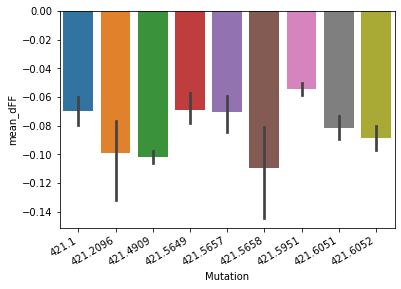

In [26]:
fig = plt.figure()
ax = sns.barplot(x="Mutation", y="mean_dFF", data=df2)
plt.xticks(np.arange(len(sensors)),rotation=30, ha = 'right')
fig.savefig(sumPath + '/Voltron_I-Clamp.png',dpi=1200)
plt.show()


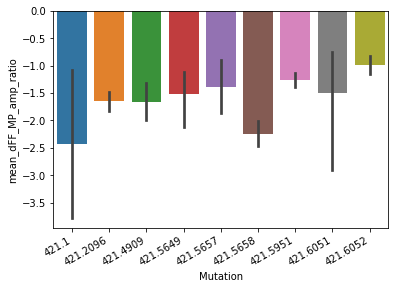

In [25]:
# ax = sns.barplot(x="Mutation", y="mean_dFF_MP_amp_ratio", data=df2)
# plt.xticks(np.arange(len(sensors)),rotation=30, ha = 'right')
# plt.show()

In [ ]:
# %matplotlib tk # plot in a new window
import unicodedata
import seaborn as sns
sns.set()
sns.set_style(style='whitegrid')

fig = plt.figure(figsize=[5.3,5])
params = ['dFF']
x_label = ''
y_label = [unicodedata.lookup("GREEK CAPITAL LETTER delta") + 'F/F']

for i in range(len(params)):
    ax = plt.subplot(1,1,i+1)
    for sensor in sensors: # Manually pick up sensors to plot

    
        df_sensor = df[df.Mutation == sensor]
        param_mean = np.nanmean(df_sensor[params[i]].tolist(), axis=0)
        param_sem = np.nanstd(df_sensor[params[i]].tolist(), axis=0)/(len(df_sensor)-1)
        x = np.linspace(-100,60,9)
        ax.errorbar(x, param_mean, yerr = param_sem, fmt = 'o-', label = sensor + ' (%d)' %len(df_sensor))
    ax.legend()
    ax.set_xlabel(x_label)
#     ax.set_ylim([-0.3,0.3])
    ax.set_ylabel(y_label[i])
#     ax.set_title(params[i])



plt.setp(ax, xticks=x)
plt.tight_layout()

handles, labels = ax.get_legend_handles_labels() # Following 3 lines remove the errorbars from legend
handles = [h[0] for h in handles]
ax.legend(handles, labels)
ax.set_ylim([-0.1,0.05])
# fig.savefig('/Users/zhengj10/Desktop/dead_voltron_positron.png',dpi=1200)
plt.show()


- Plot dFF etc for each voltage step

In [ ]:
sensors = df.Mutation.unique()
# sensors = ['376.20950','485.20950']
sensors


In [ ]:
# %matplotlib tk # plot in a new window
import unicodedata
import seaborn as sns
sns.set()
sns.set_style(style='whitegrid')

fig = plt.figure(figsize=[5.3,5])
params = ['dFF']
x_label = 'mV'
y_label = [unicodedata.lookup("GREEK CAPITAL LETTER delta") + 'F/F']

for i in range(len(params)):
    ax = plt.subplot(1,1,i+1)
    for sensor in sensors: # Manually pick up sensors to plot

    
        df_sensor = df[df.Mutation == sensor]
        param_mean = np.nanmean(df_sensor[params[i]].tolist(), axis=0)
        param_sem = np.nanstd(df_sensor[params[i]].tolist(), axis=0)/(len(df_sensor)-1)
        x = np.linspace(-100,60,9)
        ax.errorbar(x, param_mean, yerr = param_sem, fmt = 'o-', label = sensor + ' (%d)' %len(df_sensor))
    ax.legend()
    ax.set_xlabel(x_label)
#     ax.set_ylim([-0.3,0.3])
    ax.set_ylabel(y_label[i])
#     ax.set_title(params[i])



plt.setp(ax, xticks=x)
plt.tight_layout()

handles, labels = ax.get_legend_handles_labels() # Following 3 lines remove the errorbars from legend
handles = [h[0] for h in handles]
ax.legend(handles, labels)
ax.set_ylim([-0.1,0.05])
# fig.savefig('/Users/zhengj10/Desktop/dead_voltron_positron.png',dpi=1200)
plt.show()


In [ ]:
df_sel = df[df['Plate'] == 'plate_001']
df_sel.index = np.arange(len(df_sel))
df_sel

In [ ]:
fig = plt.figure(figsize=[6,6])
for i,r in df_sel.iterrows():
    imgFile = os.path.join(rawPath, r['Date'], r['Plate'], r['Cell'], 'fluor_image_000.tif')
    imgFile = tff.TiffFile(imgFile)
    imgFile = imgFile.asarray()[193:321,193:321]
    ax = plt.subplot(3,3,i+1)
    ax.imshow(imgFile, cmap = 'gray')
    if i==0:
        ax.plot([95,115],[115,115],color='w')
    ax.set_xticks([]) 
    ax.set_yticks([])
# fig.suptitle(r['Mutation'])
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/421.4494.png',dpi=1200)
plt.show()


In [ ]:
df['Date'][0][:10]

In [ ]:
import tifffile as tff
fig = plt.figure(figsize = [12,9.5])

for date in datePath:
    platePath = pb.getPathInfo(os.path.join(rawPath, date))
    i = 1
    for plate in platePath:
        if plate == 'plate_000':
            print(plate)
            idxFile = os.path.join(rawPath, date, plate, '.index')
            a = yaml.load(open(idxFile), Loader=yaml.FullLoader)
            mutation = a['.']['mutation_1']

            cellPath = pb.getPathInfo(os.path.join(rawPath, date, plate))



            for cell in cellPath:

                imgFile = os.path.join(rawPath, date, plate, cell, 'fluor_image_000.tif')
                if not os.path.exists(imgFile):
                    continue
                imgFile = tff.TiffFile(imgFile)
                imgFile = imgFile.asarray()[193:321,193:321]
                ax = plt.subplot(3,4,i)
                ax.imshow(imgFile, cmap = 'gray')
    #                 ax.set_title(mutation)
                i += 1






                ax.set_xticks([]) 
                ax.set_yticks([]) 

plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/focus_plane_128x128.png')
plt.show()



In [ ]:
df

In [ ]:
sns.set_style(style='whitegrid')

fig = plt.figure(figsize=[2,2.5])
params = ['F0']
f0_mean = []
f0_sem = []
for i in range(len(params)):
    ax = plt.subplot(1,1,i+1)
    for sensor in sensors: # Manually pick up sensors to plot

    
        df_sensor = df[df.Mutation == sensor]
        param_mean = np.nanmean(df_sensor[params[i]].tolist(), axis=0)[0]
        param_sem = np.nanstd(df_sensor[params[i]].tolist(), axis=0)[0]/(len(df_sensor)-1)
        f0_mean.append(param_mean)
        f0_sem.append(param_sem)
        
x = np.arange(1,len(sensors)+1)
        
ax.bar(x, f0_mean, yerr = f0_sem)
ax.set_ylabel('F0')
plt.xticks(x, sensors, rotation=30, ha = 'right')
# plt.setp(ax, xticks=x)
plt.tight_layout()

# fig.savefig('/Users/zhengj10/Desktop/Dead_Voltron_positron_f0.png',dpi=1200)
plt.show()
